In [637]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erfinv
import random

# Bayes

In [638]:
data = pd.read_excel('data.xlsx')


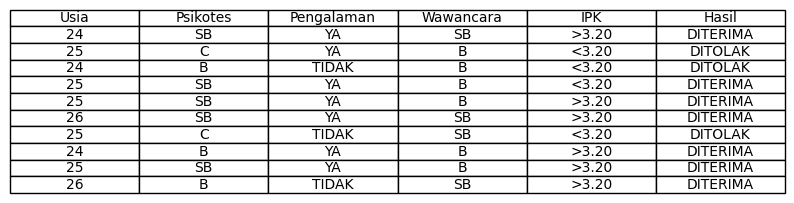

In [639]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')
ax.table(cellText=data.values, colLabels=data.columns, cellLoc='center',loc='center')
plt.show()

Contoh Data Pelamar Baru


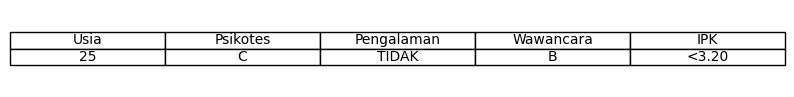

In [640]:
pelamar=pd.DataFrame({
    'Usia':[25],
    'Psikotes':['C'],
    'Pengalaman':['TIDAK'],
    'Wawancara':['B'],
    'IPK':['<3.20']
})

print("Contoh Data Pelamar Baru")
fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('off')
ax.table(cellText=pelamar.values, colLabels=pelamar.columns, cellLoc='center',loc='center')
plt.show()

p_Acc = pd.DataFrame({
    'Usia':[0],
    'Psikotes':[0],
    'Pengalaman':[0],
    'Wawancara':[0],
    'IPK':[0]
})
p_Rej = pd.DataFrame({
    'Usia':[0],
    'Psikotes':[0],
    'Pengalaman':[0],
    'Wawancara':[0],
    'IPK':[0]
})

countAcc=0
countRej=0
for indeks , value in data["Hasil"].items():
    if value=="DITERIMA":
        countAcc+=1
    elif value == "DITOLAK":
        countRej+=1



In [641]:
def prob(Kolom, Kondisi):
    result = 0
    total = 0
    count = 0
    for indeks, value in data[Kolom].items():          
        if value == pelamar[Kolom][0] and data["Hasil"][indeks] == Kondisi:
            total += 1
        if data["Hasil"][indeks] == Kondisi:
            count += 1
    if count > 0:
        result = total / count
    return result 

def probb(pelamar, Kolom, Kondisi,i):
    result = 0
    total = 0
    count = 0
    for indeks, value in data[Kolom].items():          
        if value == pelamar[Kolom][i] and data["Hasil"][indeks] == Kondisi:
            total += 1
        if data["Hasil"][indeks] == Kondisi:
            count += 1
    if count > 0:
        result = total / count
    return result 

In [642]:
p_Acc['Usia'][0] = prob('Usia','DITERIMA')
p_Acc['Psikotes'][0] = prob('Psikotes','DITERIMA')
p_Acc['Pengalaman'][0] = prob('Pengalaman','DITERIMA')
p_Acc['Wawancara'][0] = prob('Wawancara','DITERIMA')
p_Acc['IPK'][0] = prob('IPK','DITERIMA')
p_Rej['Usia'][0] = prob('Usia','DITOLAK')
p_Rej['Psikotes'][0] = prob('Psikotes','DITOLAK')
p_Rej['Pengalaman'][0] = prob('Pengalaman','DITOLAK')
p_Rej['Wawancara'][0] = prob('Wawancara','DITOLAK')
p_Rej['IPK'][0] = prob('IPK','DITOLAK')




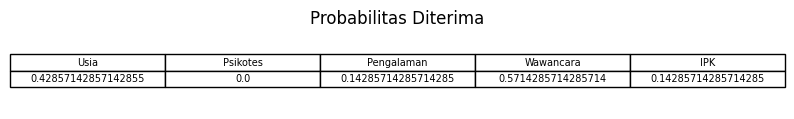

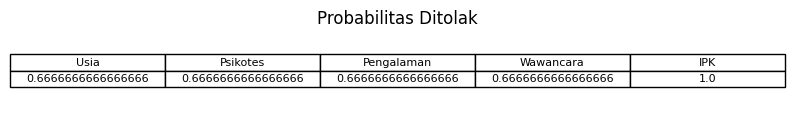

In [643]:
fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('off')
ax.table(cellText=p_Acc.values, colLabels=p_Acc.columns, cellLoc='center',loc='center')
plt.title("Probabilitas Diterima")
plt.show()
fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('off')
ax.table(cellText=p_Rej.values, colLabels=p_Rej.columns, cellLoc='center',loc='center')
plt.title("Probabilitas Ditolak")
plt.show()


In [644]:
print("Probabilitas diterima")
print(p_Acc.prod().prod())
print("Probabilitas ditolak")
print(p_Rej.prod().prod())

Probabilitas diterima
0.0
Probabilitas ditolak
0.19753086419753085


In [645]:
print("nilai rekomendasi")
print("P(X|Diterima)\t= ",p_Acc.prod().prod()*countAcc)
print("P(X|Ditolak)\t= ",p_Rej.prod().prod()*countRej)

nilai rekomendasi
P(X|Diterima)	=  0.0
P(X|Ditolak)	=  0.5925925925925926


# Uji Normalitas

   Contoh Data  Rank    Indeks  Formula Z-Score       PDF
0     0.045837     6  0.548780         0.122581  0.395956
1     0.000000     1  0.060976        -1.546635  0.120636
2     0.000000     1  0.060976        -1.546635  0.120636
3     0.104761    10  0.939024         1.546635  0.120636
4     0.090094     8  0.743902         0.655424  0.321831
5     0.045837     6  0.548780         0.122581  0.395956
6     0.000000     1  0.060976        -1.546635  0.120636
7     0.024818     5  0.451220        -0.122581  0.395956
8     0.090094     8  0.743902         0.655424  0.321831
9     0.003048     4  0.353659        -0.375462  0.371791
Correlation =  0.9241255765608283
Hasil : Data Normal


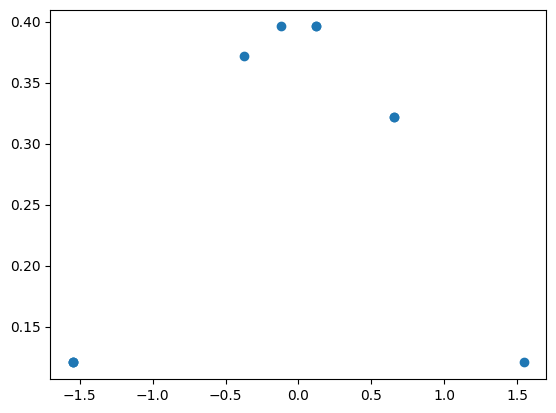

In [646]:
normalisasi = pd.DataFrame({
    'Contoh Data':[0.0458374,0,0,0.1047606,0.0900942,0.0458374,0,0.0248179,0.0900942,0.0030478]
})

# menghitung rank
normalisasi['Rank'] = normalisasi['Contoh Data'].rank(method='min', ascending=True).astype(int)

# menghitung indeks
normalisasi['Indeks'] = (normalisasi['Rank'] - 3/8) / (len(normalisasi) + 1/4)

# menghitung formula z-score
normalisasi['Formula Z-Score'] = norm.ppf(normalisasi['Indeks'], 0, 1)

# menghitung PDF
normalisasi['PDF'] = norm.pdf(normalisasi['Formula Z-Score'], loc=0, scale=1)

corr = normalisasi['Contoh Data'].corr(normalisasi['Formula Z-Score'])
print(normalisasi)
# fig, ax = plt.subplots(figsize=(10, 3))
# ax.axis('off')
# ax.table(cellText=normalisasi.values, colLabels=normalisasi.columns, cellLoc='center',loc='center')
# plt.title("Uji Normalitas")
# plt.show()


print("Correlation = ", corr)
if corr > 0.05:
    print("Hasil : Data Normal")
else :
    print("Hasil : Data Tidak Normal")



plt.scatter(normalisasi['Formula Z-Score'],normalisasi['PDF'])


plt.show()




In [647]:
usia = [24]*3+[25]*1+[26]*1
psikotes = ['SB','B']
pengalaman = ['YA']*6+['TIDAK']*1
wawancara = ['SB','B']
ipk = ['<3.20']*2+['>3.20']*5

# membuat list kosong untuk menampung baris data
data_rows = []

# loop untuk membuat 20 baris data
for i in range(50):
    # membuat satu baris data
    data2 = {
        'Usia': random.choice(usia),
        'Psikotes': random.choice(psikotes),
        'Pengalaman': random.choice(pengalaman),
        'Wawancara': random.choice(wawancara),
        'IPK': random.choice(ipk),
        
        'P(Berhasil)':0
        
    }
    # menambahkan baris data ke list data_rows
    data_rows.append(data2)

# membuat DataFrame dari list data_rows
new_Data = pd.DataFrame(data_rows)
for i in range(50):
    new_Data['P(Berhasil)'][i]=(probb(new_Data,'Usia','DITERIMA',i)*probb(new_Data,'Psikotes','DITERIMA',i)
    *probb(new_Data,'Pengalaman','DITERIMA',i)*probb(new_Data,'Wawancara','DITERIMA',i)*probb(new_Data,'IPK','DITERIMA',i)*countAcc
    )

print(new_Data)
# fig, ax = plt.subplots(figsize=(15, 11))
# ax.axis('off')
# ax.table(cellText=new_Data.values, colLabels=new_Data.columns, cellLoc='center',loc='center')
# plt.title("Contoh Data")
plt.show()

    Usia Psikotes Pengalaman Wawancara    IPK  P(Berhasil)
0     24       SB         YA         B  <3.20     0.099958
1     25        B         YA        SB  <3.20     0.044981
2     24        B         YA        SB  >3.20     0.179925
3     25       SB         YA        SB  >3.20     0.674719
4     24       SB      TIDAK        SB  >3.20     0.074969
5     24       SB         YA         B  >3.20     0.599750
6     24       SB         YA         B  <3.20     0.099958
7     25        B         YA         B  >3.20     0.359850
8     25       SB         YA         B  >3.20     0.899625
9     24       SB         YA         B  <3.20     0.099958
10    24       SB         YA        SB  >3.20     0.449813
11    25       SB         YA         B  >3.20     0.899625
12    24       SB         YA        SB  >3.20     0.449813
13    24       SB         YA         B  >3.20     0.599750
14    24        B         YA        SB  >3.20     0.179925
15    26        B         YA        SB  >3.20     0.1799

    Contoh Data  Rank    Indeks  Formula Z-Score       PDF
0      0.099958    16  0.310945        -0.493173  0.353261
1      0.044981     7  0.131841        -1.117732  0.213611
2      0.179925    21  0.410448        -0.226393  0.388848
3      0.674719    46  0.907960         1.328298  0.165113
4      0.074969    11  0.211443        -0.801425  0.289361
5      0.599750    43  0.848259         1.028994  0.234957
6      0.099958    16  0.310945        -0.493173  0.353261
7      0.359850    36  0.708955         0.550335  0.342881
8      0.899625    49  0.967662         1.847487  0.072400
9      0.099958    16  0.310945        -0.493173  0.353261
10     0.449813    38  0.748756         0.670581  0.318613
11     0.899625    49  0.967662         1.847487  0.072400
12     0.449813    38  0.748756         0.670581  0.318613
13     0.599750    43  0.848259         1.028994  0.234957
14     0.179925    21  0.410448        -0.226393  0.388848
15     0.179925    21  0.410448        -0.226393  0.3888

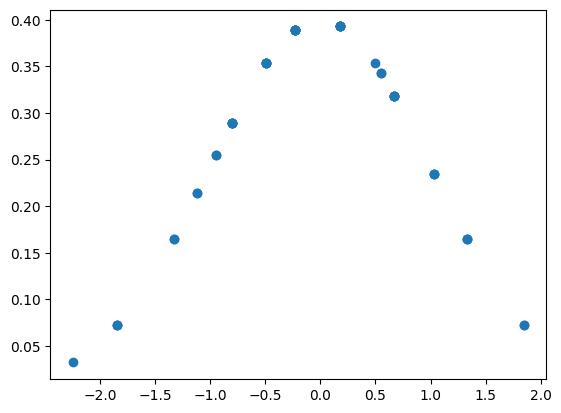

In [648]:
normalisai = pd.DataFrame({
    'Contoh Data':new_Data['P(Berhasil)']
})
# menghitung rank
normalisai['Rank'] = normalisai['Contoh Data'].rank(method='min', ascending=True).astype(int)

# menghitung indeks
normalisai['Indeks'] = (normalisai['Rank'] - 3/8) / (len(normalisai) + 1/4)

# menghitung formula z-score
normalisai['Formula Z-Score'] = norm.ppf(normalisai['Indeks'], 0, 1)

# menghitung PDF
normalisai['PDF'] = norm.pdf(normalisai['Formula Z-Score'], loc=0, scale=1)

corr = normalisai['Contoh Data'].corr(normalisai['Formula Z-Score'])
print(normalisai)
# fig, ax = plt.subplots(figsize=(15, 11))
# ax.axis('off')
# ax.table(cellText=normalisai.values, colLabels=normalisai.columns, cellLoc='center',loc='center')
# plt.title("Uji Normalitas")
# plt.show()

print("Correlation = ", corr)
if corr > 0.05:
    print("Hasil : Data Normal")
else :
    print("Hasil : Data Tidak Normal")

plt.scatter(normalisai['Formula Z-Score'],normalisai['PDF'])


plt.show()